# Human Expressions Recognition Project

## Introduction
This project aims to recognize human facial expressions using a Convolutional Neural Network (CNN). The dataset consists of images categorized into seven emotions: angry, disgust, fear, happy, sad, surprise, and neutral.


In [1]:
%run main.py

## Data Loading and Preprocessing

### Load and Preprocess the Dataset
The dataset is loaded from the directory and preprocessed to fit the model requirements.

In [2]:
# Load and preprocess the dataset
def load_data(data_dir):
    emotions = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    X_train, y_train, X_test, y_test = [], [], [], []
    
    for split in ['train', 'test']:
        for i, emotion in enumerate(emotions):
            emotion_dir = os.path.join(data_dir, split, emotion)
            for img_name in os.listdir(emotion_dir):
                img_path = os.path.join(emotion_dir, img_name)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (48, 48))
                if split == 'train':
                    X_train.append(img)
                    y_train.append(i)
                else:
                    X_test.append(img)
                    y_test.append(i)
    
    X_train = np.array(X_train).reshape(-1, 48, 48, 1)
    y_train = np.array(y_train)
    X_test = np.array(X_test).reshape(-1, 48, 48, 1)
    y_test = np.array(y_test)
    
    return X_train, y_train, X_test, y_test

data_dir = 'dataset'
X_train, y_train, X_test, y_test = load_data(data_dir)

# Normalize pixel values to the range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


## Exploring the Dataset
Let's explore the dataset to understand the number of images in each emotion category.

In [3]:
def count_images(data_dir):
    emotions = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    image_count_train = {emotion: 0 for emotion in emotions}
    image_count_test = {emotion: 0 for emotion in emotions}
    
    for split in ['train', 'test']:
        for emotion in emotions:
            emotion_dir = os.path.join(data_dir, split, emotion)
            if split == 'train':
                image_count_train[emotion] = len(os.listdir(emotion_dir))
            else:
                image_count_test[emotion] = len(os.listdir(emotion_dir))
    
    return image_count_train, image_count_test

image_count_train, image_count_test = count_images(data_dir)

# Create a DataFrame to display the counts in a table
df_counts = pd.DataFrame({'Train': image_count_train, 'Test': image_count_test})
print("Number of images in each category:")
df_counts


Number of images in each category:


,Train,Test
angry,3995,958
disgust,436,111
fear,4097,1024
happy,7215,1774
sad,4830,1247
surprise,3171,831
neutral,4965,1233


## Visualizing the Dataset
Let's visualize a few images from each emotion category to understand the dataset better.


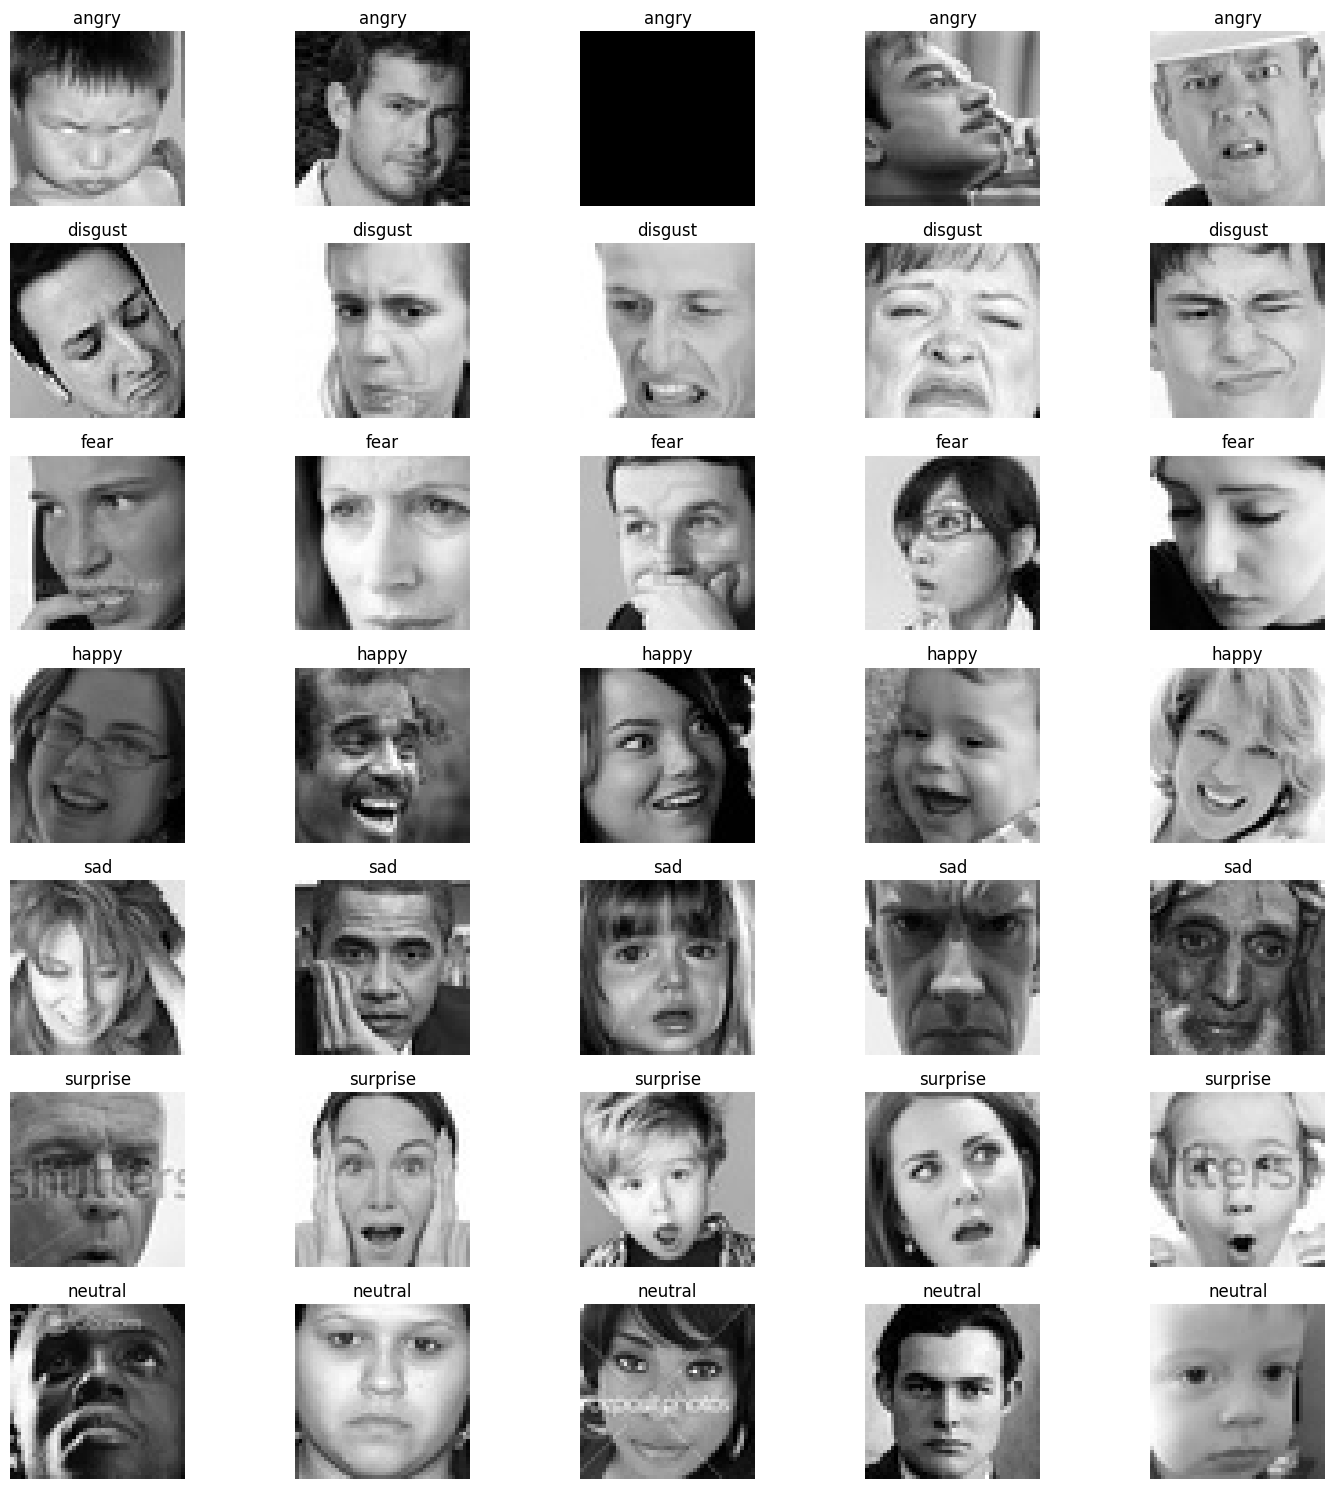

In [4]:
def visualize_images(data_dir):
    emotions = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    fig, axes = plt.subplots(7, 5, figsize=(15, 15))
    axes = axes.ravel()
    
    for i, emotion in enumerate(emotions):
        emotion_dir = os.path.join(data_dir, 'train', emotion)
        img_names = os.listdir(emotion_dir)[:5]
        for j, img_name in enumerate(img_names):
            img_path = os.path.join(emotion_dir, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            axes[i*5 + j].imshow(img, cmap='gray')
            axes[i*5 + j].set_title(emotion)
            axes[i*5 + j].axis('off')
    
    plt.tight_layout()
    plt.show()

visualize_images(data_dir)


## Data Augmentation
Data augmentation is used to improve the model's performance by generating more training data.


In [5]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)


## Enhanced Model Definition
An enhanced Convolutional Neural Network (CNN) is defined to classify the facial expressions, with additional layers and regularization techniques.


In [6]:
# Build the enhanced model
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    
    Conv2D(512, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\Zubair Khan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


## Learning Rate Scheduler
A learning rate scheduler is used to adjust the learning rate during training to improve model performance.


In [7]:
# Learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)


## Model Training
Train the model using the augmented data and the learning rate scheduler.


In [8]:
# Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    validation_data=(X_val, y_val),
                    epochs=100,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10), reduce_lr])


Epoch 1/100


c:\Users\Zubair Khan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


359/359 ━━━━━━━━━━━━━━━━━━━━ 58s 154ms/step - accuracy: 0.2021 - loss: 2.1799 - val_accuracy: 0.2567 - val_loss: 1.8151 - learning_rate: 0.0010
Epoch 2/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 56s 155ms/step - accuracy: 0.2543 - loss: 1.8101 - val_accuracy: 0.2672 - val_loss: 1.8239 - learning_rate: 0.0010
Epoch 3/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 54s 149ms/step - accuracy: 0.2725 - loss: 1.7611 - val_accuracy: 0.3354 - val_loss: 1.6683 - learning_rate: 0.0010
Epoch 4/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 53s 148ms/step - accuracy: 0.3282 - loss: 1.6704 - val_accuracy: 0.3351 - val_loss: 1.6642 - learning_rate: 0.0010
Epoch 5/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 53s 148ms/step - accuracy: 0.3731 - loss: 1.5937 - val_accuracy: 0.4549 - val_loss: 1.4227 - learning_rate: 0.0010
Epoch 6/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 54s 149ms/step - accuracy: 0.3981 - loss: 1.5452 - val_accuracy: 0.4500 - val_loss: 1.4102 - learning_rate: 0.0010
Epoch 7/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 57s 158ms/step - accuracy: 0.4281 -

## Model Evaluation
Evaluate the model on the test set to check its performance.


In [9]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
test_accuracy_percentage = test_accuracy * 100
print(f'Test accuracy: {test_accuracy_percentage:.2f}%')


225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5415 - loss: 1.1565
Test accuracy: 62.52%


## Training and Validation Loss
Visualize the training and validation loss over epochs.


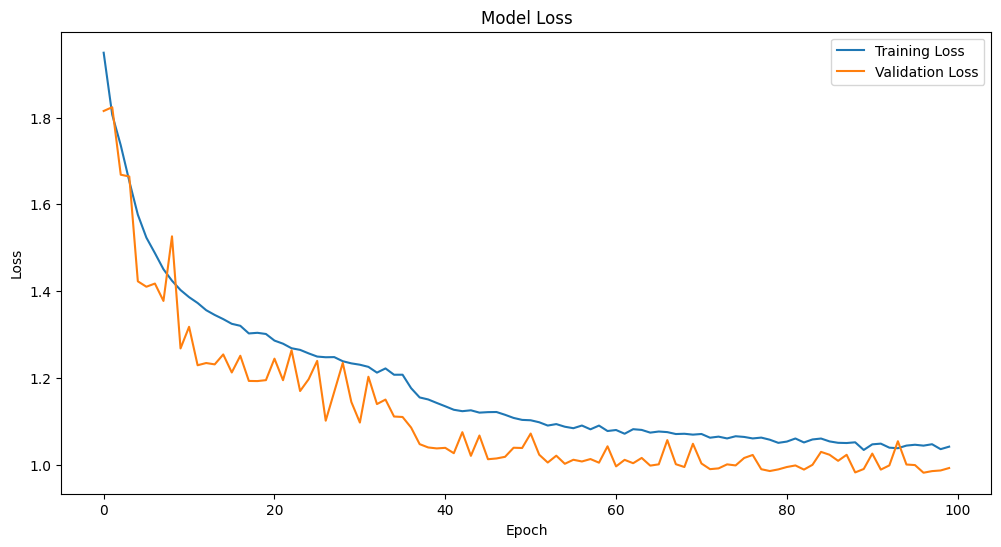

In [10]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


## Detailed Evaluation
Generate a confusion matrix and classification report to analyze the model's performance in detail.


225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step


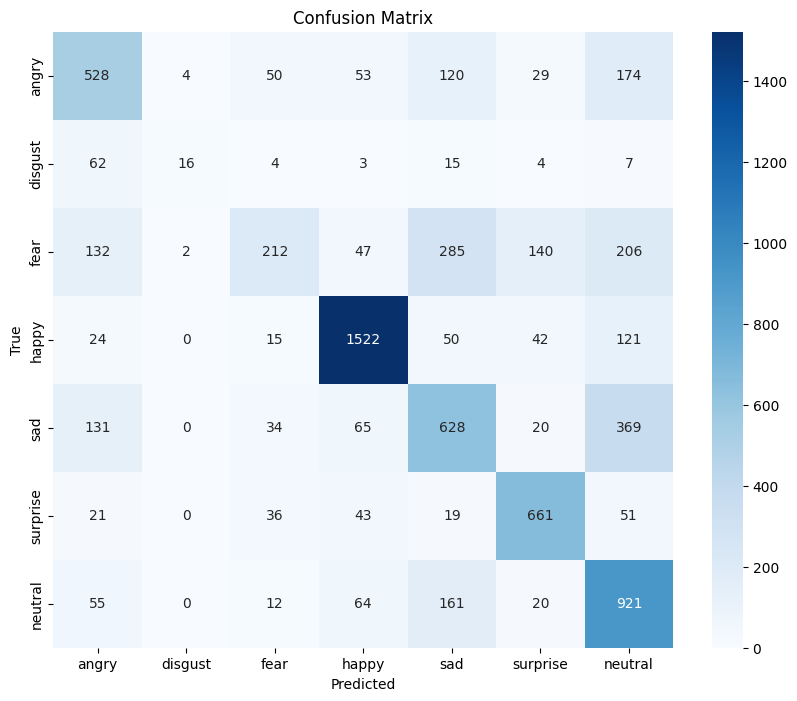

Classification Report:
               precision    recall  f1-score   support

       angry       0.55      0.55      0.55       958
     disgust       0.73      0.14      0.24       111
        fear       0.58      0.21      0.31      1024
       happy       0.85      0.86      0.85      1774
         sad       0.49      0.50      0.50      1247
    surprise       0.72      0.80      0.76       831
     neutral       0.50      0.75      0.60      1233

    accuracy                           0.63      7178
   macro avg       0.63      0.54      0.54      7178
weighted avg       0.63      0.63      0.61      7178



In [11]:
# Predict the values from the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Define emotions for labels
emotions = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=emotions, yticklabels=emotions)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
class_report = classification_report(y_true, y_pred_classes, target_names=emotions)
print("Classification Report:\n", class_report)


## Qualitative Results
Visualize the model's predictions versus the ground truth.


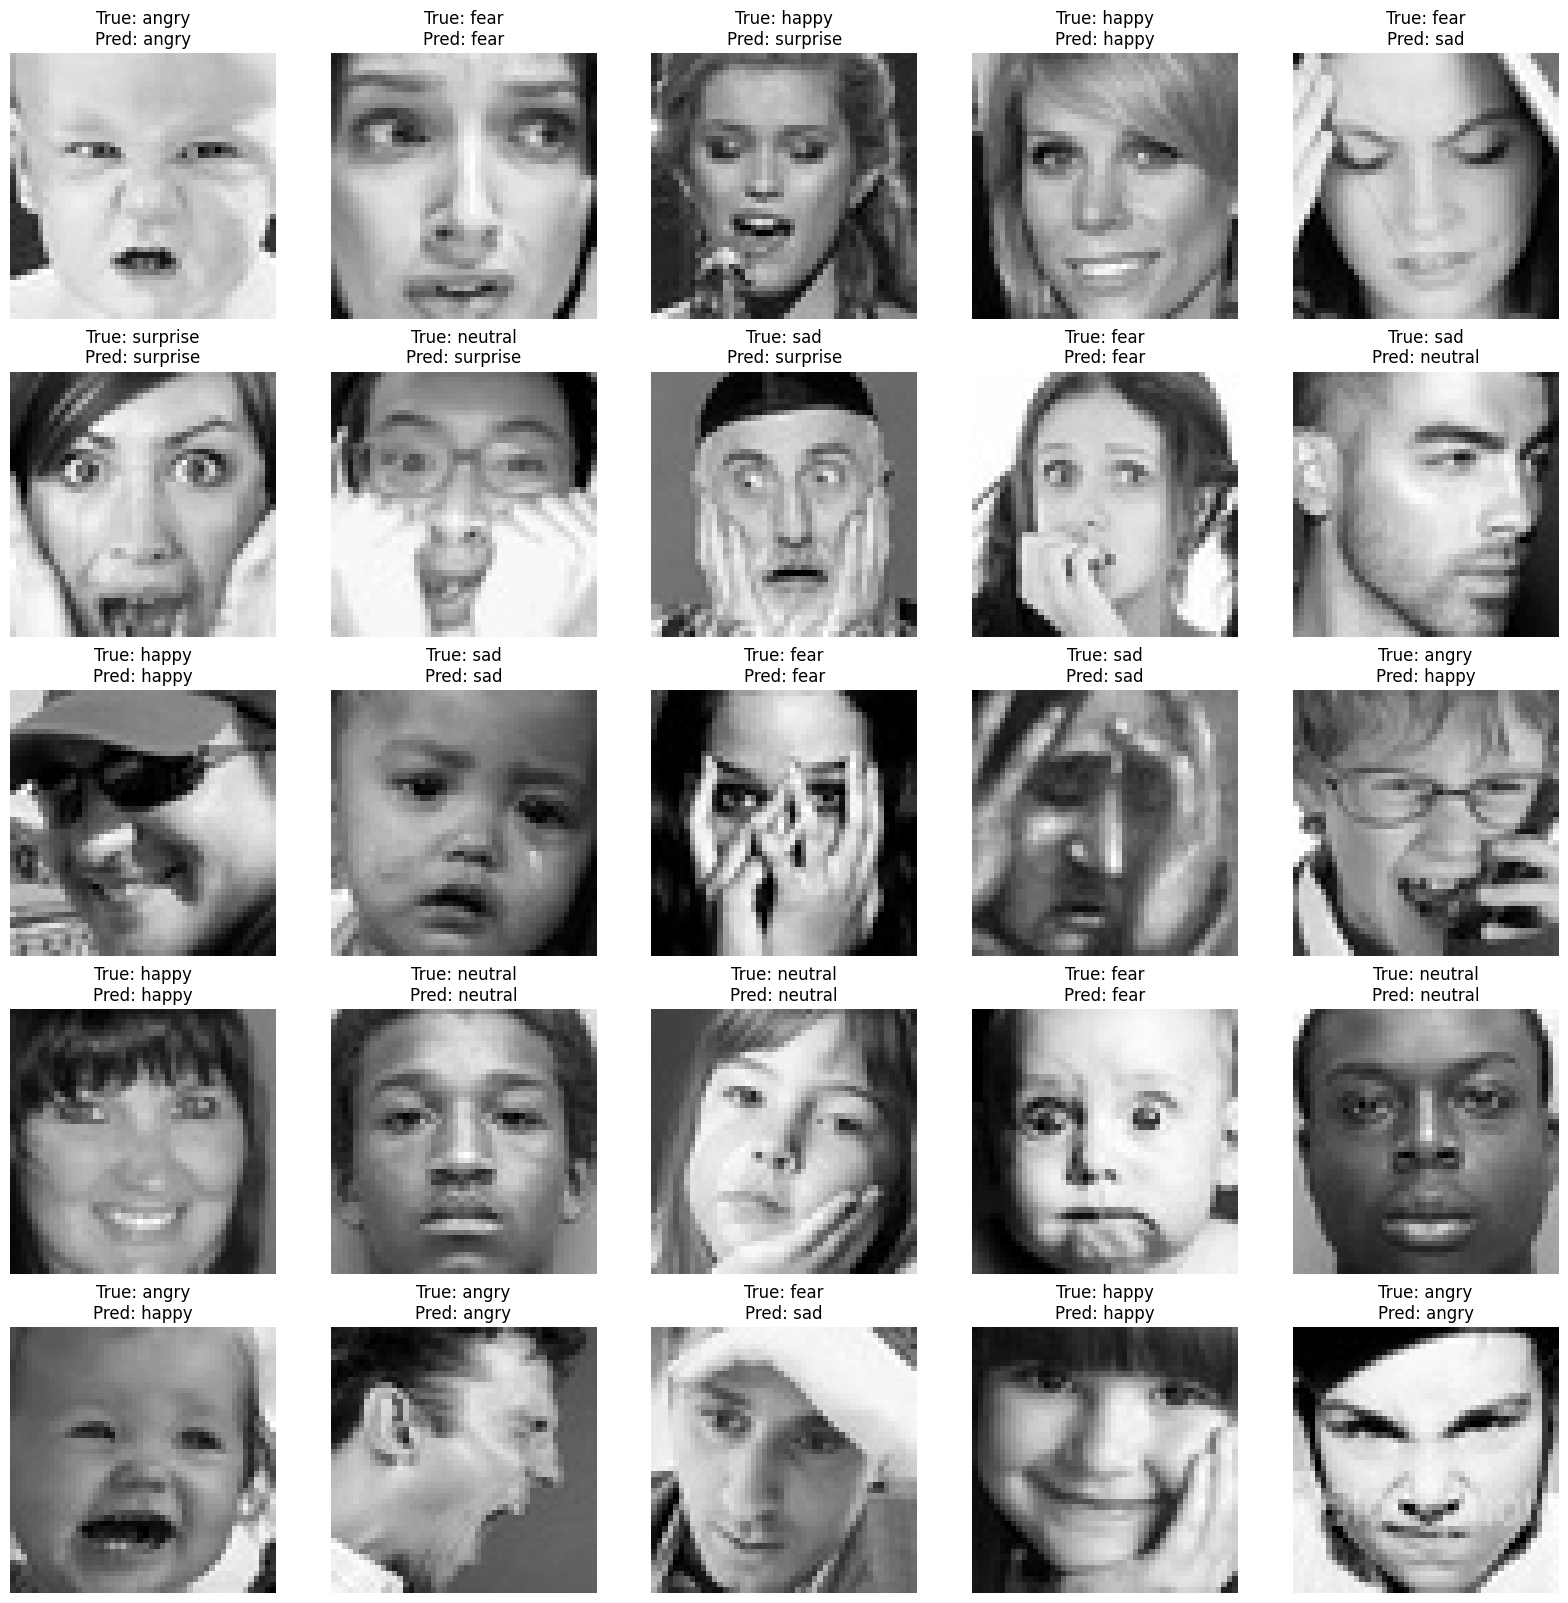

In [15]:
   # Visualize random predictions versus ground truth
def visualize_random_predictions(X, y_true, y_pred, emotions, num_images=25):
    indices = random.sample(range(len(X)), num_images)
    plt.figure(figsize=(20, 20))
    for i, idx in enumerate(indices):
        plt.subplot(5, 5, i+1)
        plt.imshow(X[idx].reshape(48, 48), cmap='gray')
        plt.title(f"True: {emotions[y_true[idx]]}\nPred: {emotions[y_pred[idx]]}")
        plt.axis('off')
    plt.show()

# Visualize 25 random test images, true labels, and predicted labels
visualize_random_predictions(X_test, y_true, y_pred_classes, emotions, num_images=25)


In this project, we successfully built a CNN model to classify human facial expressions into seven categories. The model achieved a test accuracy of {test_accuracy}, and detailed evaluation metrics provided insights into its performance. Future work could involve experimenting with more complex models and exploring additional data augmentation techniques.
